#                             Importing the required dependencies

In [209]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Importing csv file

In [210]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Analyze the data using the unique function and further steps down filtering

In [211]:
# Getting the unique values of all the coloumn
{column: len(df[column].unique()) for column in df.columns}

{'Suburb': 351,
 'Address': 34009,
 'Rooms': 12,
 'Type': 3,
 'Price': 2872,
 'Method': 9,
 'SellerG': 388,
 'Date': 78,
 'Distance': 216,
 'Postcode': 212,
 'Bedroom2': 16,
 'Bathroom': 12,
 'Car': 16,
 'Landsize': 1685,
 'BuildingArea': 741,
 'YearBuilt': 161,
 'CouncilArea': 34,
 'Lattitude': 13403,
 'Longtitude': 14525,
 'Regionname': 9,
 'Propertycount': 343}

In [212]:
# info of the data which is mainly used to observe the number of features that has are recorded as string-object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [213]:
# copying the df
data = df.copy()

In [214]:
# dropping all the null values using the dropna method
data = data.dropna(axis=0).reset_index(drop=True)

In [106]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
2,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
3,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0
4,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0


In [215]:
# dropping all the columns
data.drop(columns=['Suburb', 'Address', 'SellerG', 'Postcode', 'CouncilArea', 'Method', 'Type', 'Date'],axis=1, inplace=True)

In [216]:
# making dummies of the feature Regionname
data = data.join(pd.get_dummies(data.Regionname)).drop(['Regionname'], axis=1)

In [217]:
data.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,0,0,1,0,0,0,0,0
1,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,0,0,1,0,0,0,0,0
2,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,0,0,1,0,0,0,0,0
3,3,1876000.0,2.5,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0,0,0,1,0,0,0,0,0
4,2,1636000.0,2.5,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0,0,0,1,0,0,0,0,0


## Splitting the data in X (as for independent features) and y (as for target value)

In [218]:
y = data['Price']

In [219]:
X = data.drop('Price', axis=1)

In [222]:
# splitting to train the data prior of using the linear and Random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [223]:
train_data = X_train.join(y_train)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E09CC2DE88>,
      dtype=object)

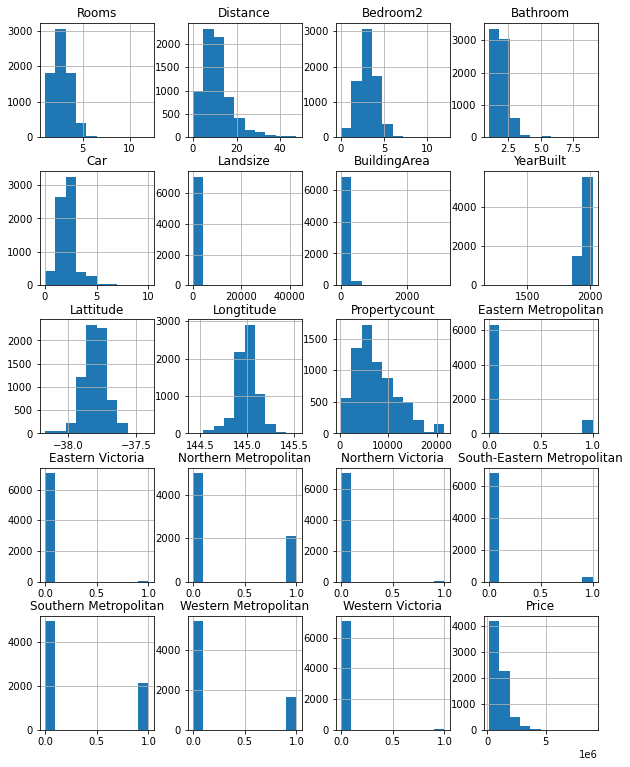

In [228]:
# observing the train data via histogram
train_data.hist(figsize=(10, 13))

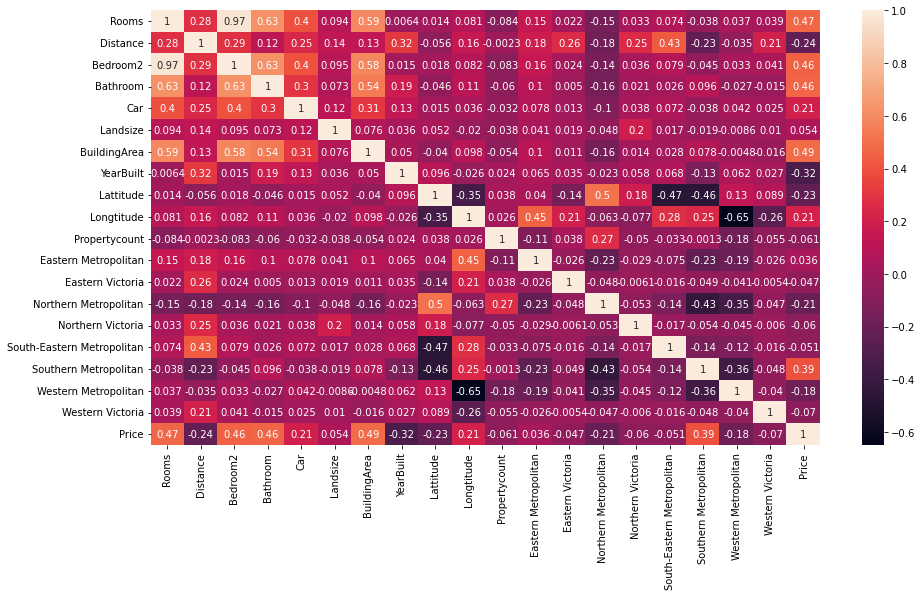

In [229]:
# observing the feature correlation with the target value using heatmap
plt.figure(figsize=(15, 8))
sn.heatmap(train_data.corr(), annot=True)

In [180]:
# transforming the through np.log for further analysis
train_data['Rooms'] = np.log(train_data['Rooms'] + 1)
train_data['Distance'] = np.log(train_data['Distance'] + 1)
train_data['Bedroom2'] = np.log(train_data['Bedroom2'] + 1)
train_data['Car'] = np.log(train_data['Car'] + 1)
train_data['Landsize'] = np.log(train_data['Landsize'] + 1)
train_data['BuildingArea'] = np.log(train_data['BuildingArea'] + 1)
train_data['YearBuilt'] = np.log(train_data['YearBuilt'] + 1)
train_data['Propertycount'] = np.log(train_data['Propertycount'] + 1)

## Introducing the linear regression model for training the data

In [230]:
# importing the linearRegression model from sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [231]:
# fitting the model with X_train and y_train
reg.fit(X_train, y_train)

LinearRegression()

### Creating the test data

In [232]:
test_data = X_train.join(y_train)
test_data['Rooms'] = np.log(test_data['Rooms'] + 1)
test_data['Distance'] = np.log(test_data['Distance'] + 1)
test_data['Bedroom2'] = np.log(test_data['Bedroom2'] + 1)
test_data['Car'] = np.log(test_data['Car'] + 1)
test_data['Landsize'] = np.log(test_data['Landsize'] + 1)
test_data['BuildingArea'] = np.log(test_data['BuildingArea'] + 1)
test_data['YearBuilt'] = np.log(test_data['YearBuilt'] + 1)
test_data['Propertycount'] = np.log(test_data['Propertycount'] + 1)

In [233]:
# visualization of the test data
test_data

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,Price
4125,1.386294,1.481605,1.386294,1.0,0.693147,5.442418,4.852030,7.550135,-37.78800,144.99670,7.991254,0,0,1,0,0,0,0,0,1500000.0
7567,1.609438,1.824549,1.609438,2.0,0.693147,6.142037,5.087596,7.563201,-37.76200,144.95180,9.385889,0,0,1,0,0,0,0,0,1470000.0
335,1.386294,2.322388,1.386294,1.0,1.098612,6.790097,4.927254,7.576097,-37.80020,145.09490,8.963160,0,0,0,0,0,1,0,0,2251000.0
4067,0.693147,1.824549,0.693147,1.0,0.693147,0.000000,3.951244,7.586296,-37.77830,144.96350,9.385889,0,0,1,0,0,0,0,0,418000.0
4607,1.386294,3.634951,1.386294,2.0,0.693147,6.539586,4.700480,7.581210,-38.11948,145.14928,7.824446,0,1,0,0,0,0,0,0,611000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,1.609438,1.280934,1.609438,2.0,0.693147,5.575949,4.983607,7.550135,-37.82610,145.01270,9.612467,0,0,1,0,0,0,0,0,1591000.0
2465,1.386294,1.871802,1.098612,2.0,1.098612,6.001415,5.198497,7.560601,-37.76730,145.00810,9.338294,0,0,1,0,0,0,0,0,1760000.0
8369,1.098612,2.646175,1.098612,1.0,1.098612,6.345636,4.430817,7.581210,-37.70652,144.96724,8.531293,0,0,1,0,0,0,0,0,700000.0
6413,1.386294,3.394508,1.386294,1.0,1.098612,6.373320,4.624973,7.580700,-37.99515,145.23244,8.170186,0,0,0,0,1,0,0,0,469000.0


## Analyzing the score of the model by testing

In [246]:
reg_score = reg.score(X_train, y_train)
print('The score of simple LinearRegression is: {:.4f}'. format(reg_score))

The score of simple LinearRegression is: 0.6197


## Preparing for the Ranodm forest

In [277]:
from sklearn.ensemble import RandomForestRegressor

In [278]:
forest = RandomForestRegressor()

In [279]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [269]:
forest_sore = forest.score(X_test, y_test)
print('The score of Random forest regressor model without scaling is: {:.4f}'. format(forest_score))

The score of Random forest regressor model without scaling is: 0.8236


In [276]:
import joblib

In [282]:
joblib.dump(forest, 'forest_model')

['forest_model']